In [1]:
# Se importan las librerias y csv.
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("Dataset/Resultados__nicos_Saber_Pro.csv")

In [2]:
df

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,...,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,20183,EK201830011083,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,NO OFICIAL - CORPORACIÓN,161,174.0,3.0,A2,139,161.0,128
1,20183,EK201830053875,CC,COLOMBIA,76.0,VALLE,76736.0,SEVILLA,NaN,NaN,...,Si,Secundaria (Bachillerato) incompleta,OFICIAL DEPARTAMENTAL,147,170.0,3.0,B1,171,188.0,182
2,20183,EK201830167993,CC,COLOMBIA,73.0,TOLIMA,73001.0,IBAGUÉ,1.730010e+11,73001.0,...,Si,No sabe,NO OFICIAL - CORPORACIÓN,142,77.0,1.0,A1,124,130.0,153
3,20183,EK201830168158,CC,COLOMBIA,68.0,SANTANDER,68081.0,BARRANCABERMEJA,1.680810e+11,68081.0,...,Si,Técnica o tecnológica completa,OFICIAL DEPARTAMENTAL,185,157.0,3.0,-A1,178,106.0,169
4,20183,EK201830164354,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.110010e+11,11001.0,...,Si,Educación profesional completa,OFICIAL DEPARTAMENTAL,114,132.0,2.0,A1,139,135.0,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991572,20212,EK202120268125,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.117690e+11,11001.0,...,Si,Educación profesional completa,NO OFICIAL - CORPORACIÓN,197,176.0,3.0,B2,184,223.0,191
991573,20212,EK202120230291,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,NaN,NaN,...,Si,Primaria incompleta,NO OFICIAL - CORPORACIÓN,113,84.0,1.0,A2,124,124.0,124
991574,20212,EK202120261846,CC,COLOMBIA,44.0,LA GUAJIRA,44430.0,MAICAO,1.444300e+11,44430.0,...,Si,Secundaria (Bachillerato) completa,OFICIAL DEPARTAMENTAL,115,117.0,2.0,A2,112,124.0,109
991575,20212,EK202120127825,CE,ESPAÑA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,NaN,NaN,...,Si,Educación profesional completa,NO OFICIAL - FUNDACIÓN,174,151.0,3.0,B2,173,224.0,182


# Data Cleaning 

In [3]:
# Eliminacion de variables.

dq=df.drop(['ESTU_TIPODOCUMENTO','ESTU_PAIS_RESIDE','ESTU_COD_RESIDE_DEPTO','ESTU_DEPTO_RESIDE',
'ESTU_CODDANE_COLE_TERMINO','ESTU_COD_COLE_MCPIO_TERMINO','ESTU_COD_DEPTO_PRESENTACION','ESTU_INST_DEPARTAMENTO',
'ESTU_PRGM_DEPARTAMENTO','ESTU_PRGM_CODMUNICIPIO','ESTU_PRGM_MUNICIPIO','ESTU_NIVEL_PRGM_ACADEMICO' ,
'ESTU_METODO_PRGM','ESTU_DEPTO_PRESENTACION','ESTU_COD_MCPIO_PRESENTACION','ESTU_MCPIO_PRESENTACION',
'ESTU_SNIES_PRGMACADEMICO','ESTU_PRIVADO_LIBERTAD','ESTU_NACIONALIDAD','ESTU_ESTUDIANTE', 'ESTU_COLE_TERMINO',
'ESTU_ESTADOINVESTIGACION', 'ESTU_TIPODOCUMENTOSB11','INST_ORIGEN'], axis=1) 

In [4]:
# cantidad total de valores NaN.

dq.isnull().sum().sort_values(ascending=False)

FAMI_TIENEAUTOMOVIL               62751
FAMI_TIENELAVADORA                57231
FAMI_TIENECOMPUTADOR              54718
FAMI_ESTRATOVIVIENDA              45999
ESTU_HORASSEMANATRABAJA           44363
FAMI_TIENEINTERNET                38238
FAMI_EDUCACIONMADRE               33937
FAMI_EDUCACIONPADRE               33217
MOD_COMUNI_ESCRITA_DESEM          32436
ESTU_PAGOMATRICULABECA             9435
ESTU_PAGOMATRICULACREDITO          9359
ESTU_PAGOMATRICULAPROPIO           9311
ESTU_PAGOMATRICULAPADRES           9254
ESTU_VALORMATRICULAUNIVERSIDAD     9014
MOD_COMUNI_ESCRITA_PUNT            7466
ESTU_MCPIO_RESIDE                  2709
ESTU_COD_RESIDE_MCPIO              2709
ESTU_GENERO                         109
MOD_INGLES_DESEM                     71
MOD_INGLES_PUNT                      71
MOD_RAZONA_CUANTITAT_PUNT             0
MOD_LECTURA_CRITICA_PUNT              0
PERIODO                               0
ESTU_FECHANACIMIENTO                  0
ESTU_CONSECUTIVO                      0


In [5]:
# NaN para varibles categóricas.

dq[['ESTU_PAGOMATRICULABECA','ESTU_PAGOMATRICULACREDITO','ESTU_GENERO','ESTU_PAGOMATRICULAPADRES',
'ESTU_PAGOMATRICULAPROPIO','FAMI_EDUCACIONPADRE','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_ESTRATOVIVIENDA',
'FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_EDUCACIONMADRE','ESTU_VALORMATRICULAUNIVERSIDAD',
'ESTU_HORASSEMANATRABAJA']]=dq[['ESTU_PAGOMATRICULABECA','ESTU_PAGOMATRICULACREDITO','ESTU_GENERO',
'ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULAPROPIO','FAMI_EDUCACIONPADRE','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA',
'FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_EDUCACIONMADRE',
'ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA']].fillna('sin_dato')

In [6]:
# NaN para variables numéricas.

dq[['ESTU_COD_RESIDE_MCPIO','ESTU_MCPIO_RESIDE']]= dq[['ESTU_COD_RESIDE_MCPIO',
'ESTU_MCPIO_RESIDE']].fillna(0)

print(f" la cantidad de NaN de var numéricas es: {dq.isnull().sum().sum()}")

# los NaN de las variables numéricas representan solo el 4% del total de los datos. Se eliminan

dq=dq.dropna()

 la cantidad de NaN de var numéricas es: 40044


In [7]:
dq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959082 entries, 0 to 991576
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PERIODO                         959082 non-null  int64  
 1   ESTU_CONSECUTIVO                959082 non-null  object 
 2   ESTU_COD_RESIDE_MCPIO           959082 non-null  float64
 3   ESTU_MCPIO_RESIDE               959082 non-null  object 
 4   INST_COD_INSTITUCION            959082 non-null  int64  
 5   INST_NOMBRE_INSTITUCION         959082 non-null  object 
 6   INST_CARACTER_ACADEMICO         959082 non-null  object 
 7   ESTU_NUCLEO_PREGRADO            959082 non-null  object 
 8   ESTU_INST_CODMUNICIPIO          959082 non-null  int64  
 9   ESTU_INST_MUNICIPIO             959082 non-null  object 
 10  ESTU_PRGM_ACADEMICO             959082 non-null  object 
 11  ESTU_VALORMATRICULAUNIVERSIDAD  959082 non-null  object 
 12  ESTU_PAGOMATRICU

In [8]:
# Se valida el tipo de datos, las variables con los puntajes de las notas se modifican a numeros enteros.

def cambia_int(col):
    dataframe=col.astype ( int )
    return dataframe

dq['MOD_INGLES_PUNT']=cambia_int(dq['MOD_INGLES_PUNT'])
dq['ESTU_COD_RESIDE_MCPIO']= cambia_int(dq['ESTU_COD_RESIDE_MCPIO'])
dq['MOD_COMUNI_ESCRITA_PUNT']=cambia_int(dq['MOD_COMUNI_ESCRITA_PUNT'])
dq['MOD_COMUNI_ESCRITA_DESEM']=cambia_int(dq['MOD_COMUNI_ESCRITA_DESEM'])

# Se Elimina el último carácter de la columna periodo. Para obtener el año de realización de la prueba.

dq['PERIODO']=dq['PERIODO']. astype ( str )
dq['PERIODO']=dq['PERIODO'].apply(lambda x: x[:-1])
dq['PERIODO']=cambia_int(dq['PERIODO'])

dq.rename(columns={'PERIODO':'AÑO', 'ESTU_COD_RESIDE_MCPIO':'Id_MCPIO','ESTU_CONSECUTIVO':'Id_ESTU',
'INST_COD_INSTITUCION':'Id_INSTITUCION', 'INST_NOMBRE_INSTITUCION':'INSTITUCION',
'ESTU_MCPIO_RESIDE':'MCPIO'} , inplace=True)

# Se genera una columna que muestre la edad del estudiante al realizar la prueba usando su fecha de nacimiento

separador_fecha = dq['ESTU_FECHANACIMIENTO'].str.split("/", n=2, expand=True)
dq.insert(2, 'ESTU_EDAD', separador_fecha[2])
dq['ESTU_EDAD']=cambia_int(dq['ESTU_EDAD'])
dq['ESTU_EDAD']= dq['AÑO']-dq['ESTU_EDAD']
dq=dq.drop(['ESTU_FECHANACIMIENTO'], axis=1) 

In [9]:
dq.head(2)

,AÑO,Id_ESTU,ESTU_EDAD,Id_MCPIO,MCPIO,Id_INSTITUCION,INSTITUCION,INST_CARACTER_ACADEMICO,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,2018,EK201830011083,21,11001,BOGOTÁ D.C.,2834,UNIVERSITARIA AGUSTINIANA- UNIAGUSTINIANA-BOGO...,INSTITUCIÓN UNIVERSITARIA,ADMINISTRACIÓN,11001,...,Si,Si,Secundaria (Bachillerato) incompleta,161,174,3,A2,139,161,128
1,2018,EK201830053875,23,76736,SEVILLA,1203,UNIVERSIDAD DEL VALLE-CALI,UNIVERSIDAD,CONTADURÍA PUBLICA,76001,...,Si,Si,Secundaria (Bachillerato) incompleta,147,170,3,B1,171,188,182


# Datos atípicos 

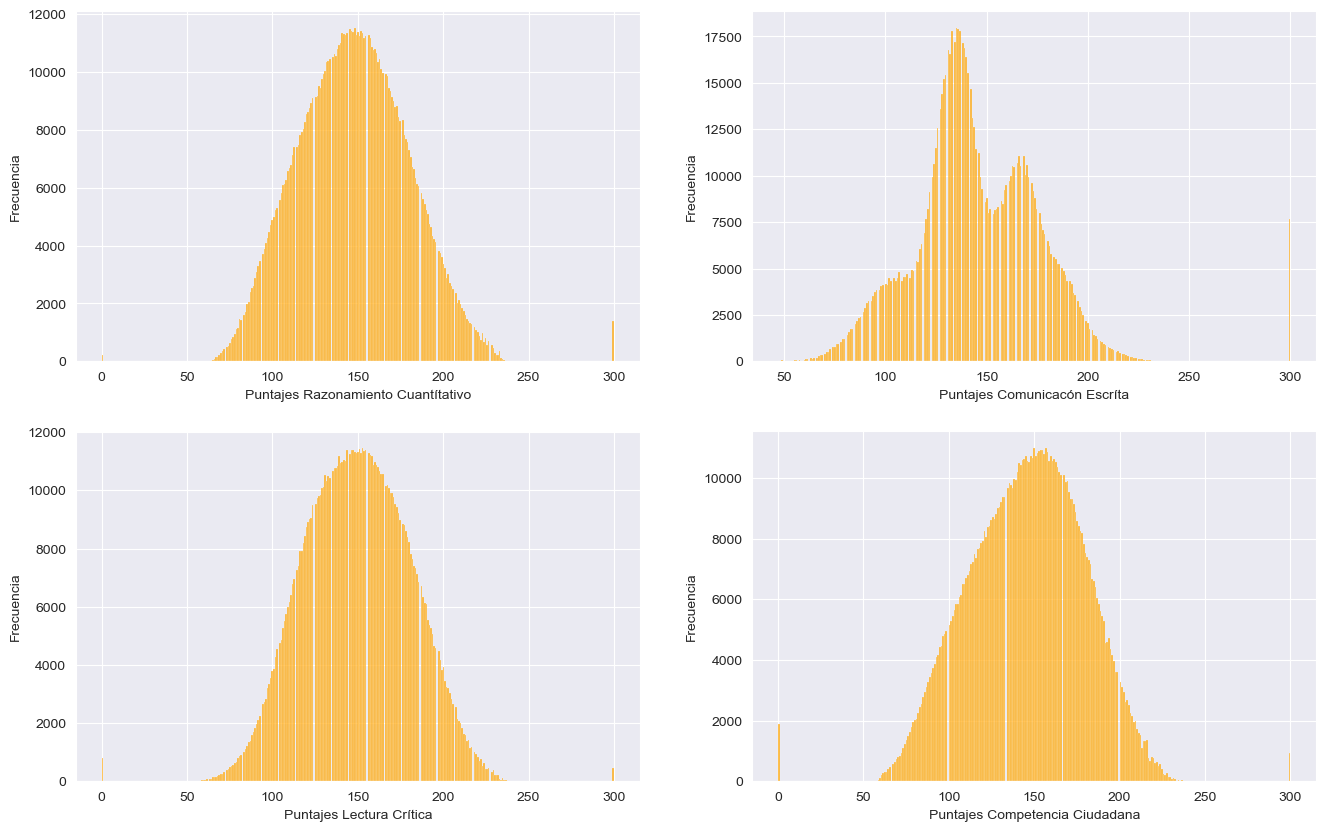

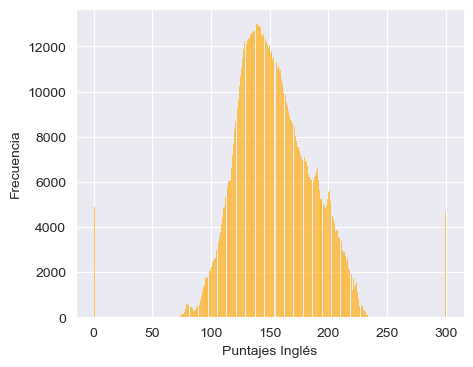

In [10]:
# Gráfica de la distribución de las variables numéricas.

''' MOD_RAZONA_CUANTITAT_PUNT, MOD_COMUNI_ESCRITA_PUNT, MOD_LECTURA_CRITICA_PUNT, 
    MOD_COMPETEN_CIUDADA_PUNT, MOD_INGLES_PUNT'''

sns.set_style("darkgrid") # Formato para el Backgound del grafico.

# Se crean ejes segmentados, para las primeras 4 gráficas.

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))

sns.histplot(data=dq,x='MOD_RAZONA_CUANTITAT_PUNT',color="orange",ax=ax[0,0]).set(xlabel="Puntajes Razonamiento Cuantítativo",
ylabel="Frecuencia")

sns.histplot(data=dq,x='MOD_COMUNI_ESCRITA_PUNT',color="orange",ax=ax[0,1]).set(xlabel="Puntajes Comunicacón Escríta",
ylabel="Frecuencia")

sns.histplot(data=dq,x='MOD_LECTURA_CRITICA_PUNT',color="orange",ax=ax[1,0]).set(xlabel= "Puntajes Lectura Crítica",
ylabel="Frecuencia")

sns.histplot(data=dq,x='MOD_COMPETEN_CIUDADA_PUNT',color="orange",ax=ax[1,1]).set(xlabel="Puntajes Competencia Ciudadana",
ylabel="Frecuencia")

# Ultima gráfica.

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 4))
sns.histplot(data=dq, x='MOD_INGLES_PUNT', color="orange" ).set( xlabel = "Puntajes Inglés",ylabel="Frecuencia" )  
plt.show()


In [11]:
# Aplicación de regla de los tres sigmas para outliers.

def outliers(dq):
    sample = dq.describe().T
    sample['median'] = dq.median()
    sample['outlier_max']= round(dq.mean() +( 3 *dq.std()))
    sample['outlier_min']= round(dq.mean() -( 3 *dq.std()))
    #Reordenamos los índices
    sample = sample.iloc[:,[0,1,8,2,3,4,5,6,7,9,10]]
    return(sample)

outliers(dq[['MOD_RAZONA_CUANTITAT_PUNT','MOD_COMUNI_ESCRITA_PUNT','MOD_LECTURA_CRITICA_PUNT',
'MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT',]])   

,count,mean,median,std,min,25%,50%,75%,max,outlier_max,outlier_min
MOD_RAZONA_CUANTITAT_PUNT,959082.0,147.608977,147.0,32.094890,0.0,125.0,147.0,170.0,300.0,244.0,51.0
MOD_COMUNI_ESCRITA_PUNT,959082.0,145.415547,142.0,31.533675,47.0,127.0,142.0,166.0,300.0,240.0,51.0
MOD_LECTURA_CRITICA_PUNT,959082.0,149.662598,150.0,30.884142,0.0,127.0,150.0,172.0,300.0,242.0,57.0
MOD_COMPETEN_CIUDADA_PUNT,959082.0,145.662284,147.0,33.571110,0.0,122.0,147.0,170.0,300.0,246.0,45.0
MOD_INGLES_PUNT,959082.0,153.626617,150.0,33.300381,0.0,131.0,150.0,175.0,300.0,254.0,54.0


Se analiza el puntaje de 0-300 de 959082 estudiantes en las pruebas. Solo se tendra en cuenta los valores atípicos con puntajes de prueba menores a 51.<br>
El total de estudiastes que respondieron correctamente solo 57 preguntas es de aprox 7863. Este valor es menos que el 1% de los datos.  


In [12]:
len(dq)

959082

In [13]:
# Contamos los valores atípicos por debajo del límite inferior.  

out_compe_ciud=len(dq[dq['MOD_RAZONA_CUANTITAT_PUNT']<= 51])
out_comu_escrt=len(dq[dq['MOD_COMUNI_ESCRITA_PUNT']<= 51])
out_lect_crit=len(dq[dq['MOD_LECTURA_CRITICA_PUNT']<=57])
out_compt_ciu=len(dq[dq['MOD_COMPETEN_CIUDADA_PUNT']<=45])
out_ingles=len(dq[dq['MOD_INGLES_PUNT']<= 54])

print(f" los outliers inferiores al limite minímo de 3 sigma son: \n \n razonamiento cuantitativo: {out_compe_ciud} \n comunicacion escrita: {out_comu_escrt} \n lectura critica:{out_lect_crit} \n competencia ciudadana: {out_compt_ciu}\n ingles: {out_ingles}") 
print(" total",7863)

 los outliers inferiores al limite minímo de 3 sigma son: 
 
 razonamiento cuantitativo: 215 
 comunicacion escrita: 59 
 lectura critica:812 
 competencia ciudadana: 1893
 ingles: 4884
 total 7863


# Interpretación de los datos e insights


Las variables del dataframe que contienen la información de los puntajes de las pruebas **MOD_RAZONA_CUANTITAT_PUNT, MOD_COMUNI_ESCRITA_PUNT,  MOD_LECTURA_CRITICA_PUNT, MOD_COMPETEN_CIUDADA_PUNT,** y **MOD_INGLES_PUNT**. Representan las competencias de **Razonamiento Cuantitativo, Comunicación Escrita, Lectura critica, Competencia Ciudadana** e **Inglés**.<br>


Para evalúar las competencias mencionadas se implementa el desempeño numérico que establece el Icfes. De 1 a 4 (*siendo 1 el más bajo*) por medio de la relación a continuacíon. El desempeño en el área de ingles es  -A1, A1, B1 hasta B2 (*siendo 0.5 el más bajo*)
 <br> 
 

| **Razonamiento cuantitativo,  lectura crítica  competencia ciudadana** |               |        **Inglés**       |               |     |
|:----------------------------------------------------------------------:|:-------------:|:-----------------------:|:-------------:|:---:|
|                         **Preguntas Correctas**                        | **Desempeño** | **Preguntas Correctas** | **Desempeño** |     |
|                                 185-300                                |       4       |         200-300         |       B2      |  4  |
|                                 150-184                                |       3       |         180-199         |       B1      |  3  |
|                                 116-149                                |       2       |         146-179         |       A2      |  2  |
|                                  0-115                                 |       1       |         123-145         |       A1      |  1  |
|                                                                        |               |          0-122          |      -A1      | 0.5 |

*[fuente](https://www.icfes.gov.co/)*

In [14]:
# Conforme a las tablas establecidas:

# Se crean las variables notas de desempeño para Razonamiento cuantitativo, Lectura crítica y Competencia ciudadana. 

def notas_desemp(col):
    sample=col.apply(lambda x: 0 if x < 0 else(1 if 0 >= x <= 115 else(2 if 116 <= x <= 149 else (3 if 150 <= x <= 183
    else(4)))))
    return sample

dq['MOD_RAZONA_CUANTITAT_DESEM']= notas_desemp(dq['MOD_RAZONA_CUANTITAT_PUNT'])
dq['MOD_LECTURA_CRITICA_DESEM']= notas_desemp(dq['MOD_LECTURA_CRITICA_PUNT'])
dq['MOD_COMPETEN_CIUDADA_DESEM']= notas_desemp(dq['MOD_COMPETEN_CIUDADA_PUNT'])

# Variables para las notas de desempeño Inglés

dq['MOD_INGLES_DESEM2'] = dq['MOD_INGLES_PUNT'].apply(lambda x:0 if x <0 else(0.5 if 0 >= x <= 122 else(1 
if 123 <= x <= 145 else (2 if 146 <= x <= 170 else(3 if 171<=x<=199 else(4) )))))

Se exporta el dataframe. Para desarrollar una base de datos con modelo de entidad-relacional sql  []

In [125]:
#  Se crea Dataframe Estudiantes

estudiantes= dq.drop(['MCPIO','INSTITUCION','INST_CARACTER_ACADEMICO','ESTU_INST_CODMUNICIPIO',
'ESTU_INST_MUNICIPIO','MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT',
'MOD_INGLES_PUNT','MOD_INGLES_DESEM','MOD_COMUNI_ESCRITA_PUNT'], axis=1)
estudiantes.head(2)

,AÑO,Id_ESTU,ESTU_EDAD,Id_MCPIO,Id_INSTITUCION,ESTU_NUCLEO_PREGRADO,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,...,FAMI_TIENELAVADORA,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,MOD_COMUNI_ESCRITA_DESEM,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_DESEM2
0,2018,EK201830011083,21,11001,2834,ADMINISTRACIÓN,HOTELERIA Y TURISMO,Entre 2.5 millones y menos de 4 millones,No,No,...,Si,Estrato 2,Si,Si,Secundaria (Bachillerato) incompleta,3,3,2,2,2.0
1,2018,EK201830053875,23,76736,1203,CONTADURÍA PUBLICA,CONTADURIA PUBLICA,Menos de 500 mil,No,No,...,Si,Estrato 2,Si,Si,Secundaria (Bachillerato) incompleta,3,2,3,3,3.0


In [126]:
# Graficas para variables Categóricas

estu_cat = estudiantes.select_dtypes('O')

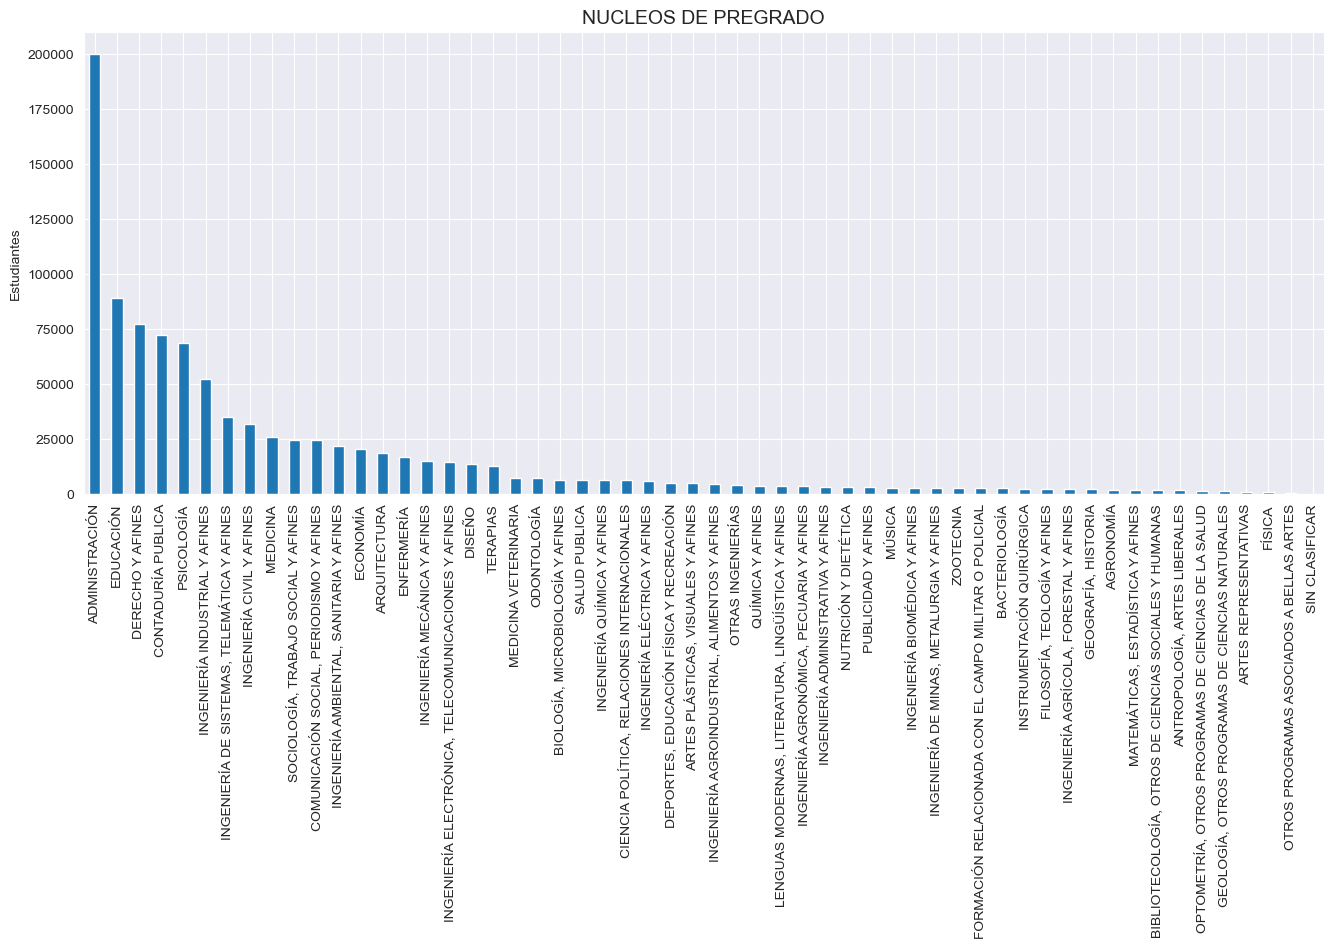

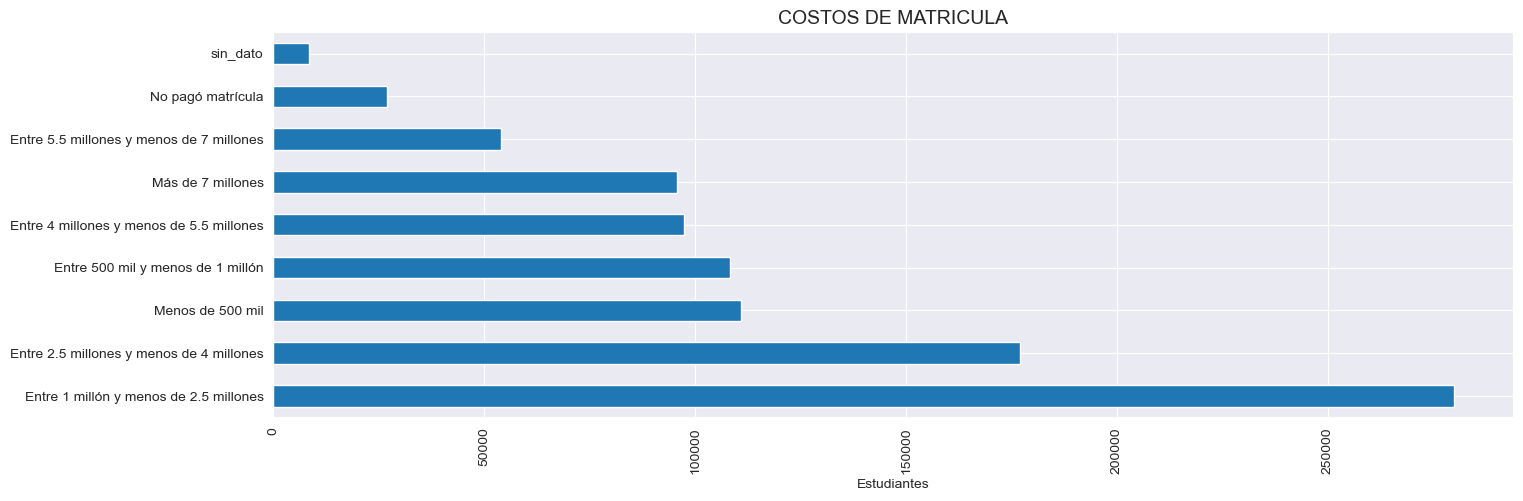

In [31]:
# Programas académicos 

f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6))
estu_cat['ESTU_NUCLEO_PREGRADO'].value_counts().plot.bar(rot=0)
plt.xticks(rotation=90)
plt.ylabel('Estudiantes') 
plt.title("NUCLEOS DE PREGRADO", fontsize = 14 )

# Costos de matrícula

f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 5))
estu_cat['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().plot.barh (rot=0)
plt.xticks(rotation=90)
plt.xlabel('Estudiantes') 
plt.title("COSTOS DE MATRICULA", fontsize = 14)
plt.show()



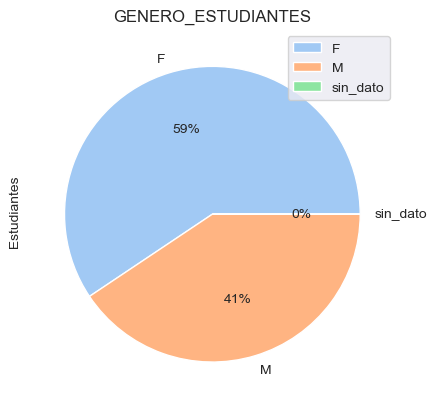

In [132]:
# Sexo estudiantes
estu_cat['ESTU_GENERO'].value_counts().plot(kind='pie', colors=sns.color_palette('pastel'), autopct='%1.0f%%')
plt.ylabel(' Estudiantes') 
plt.title("GENERO_ESTUDIANTES")
plt.show()

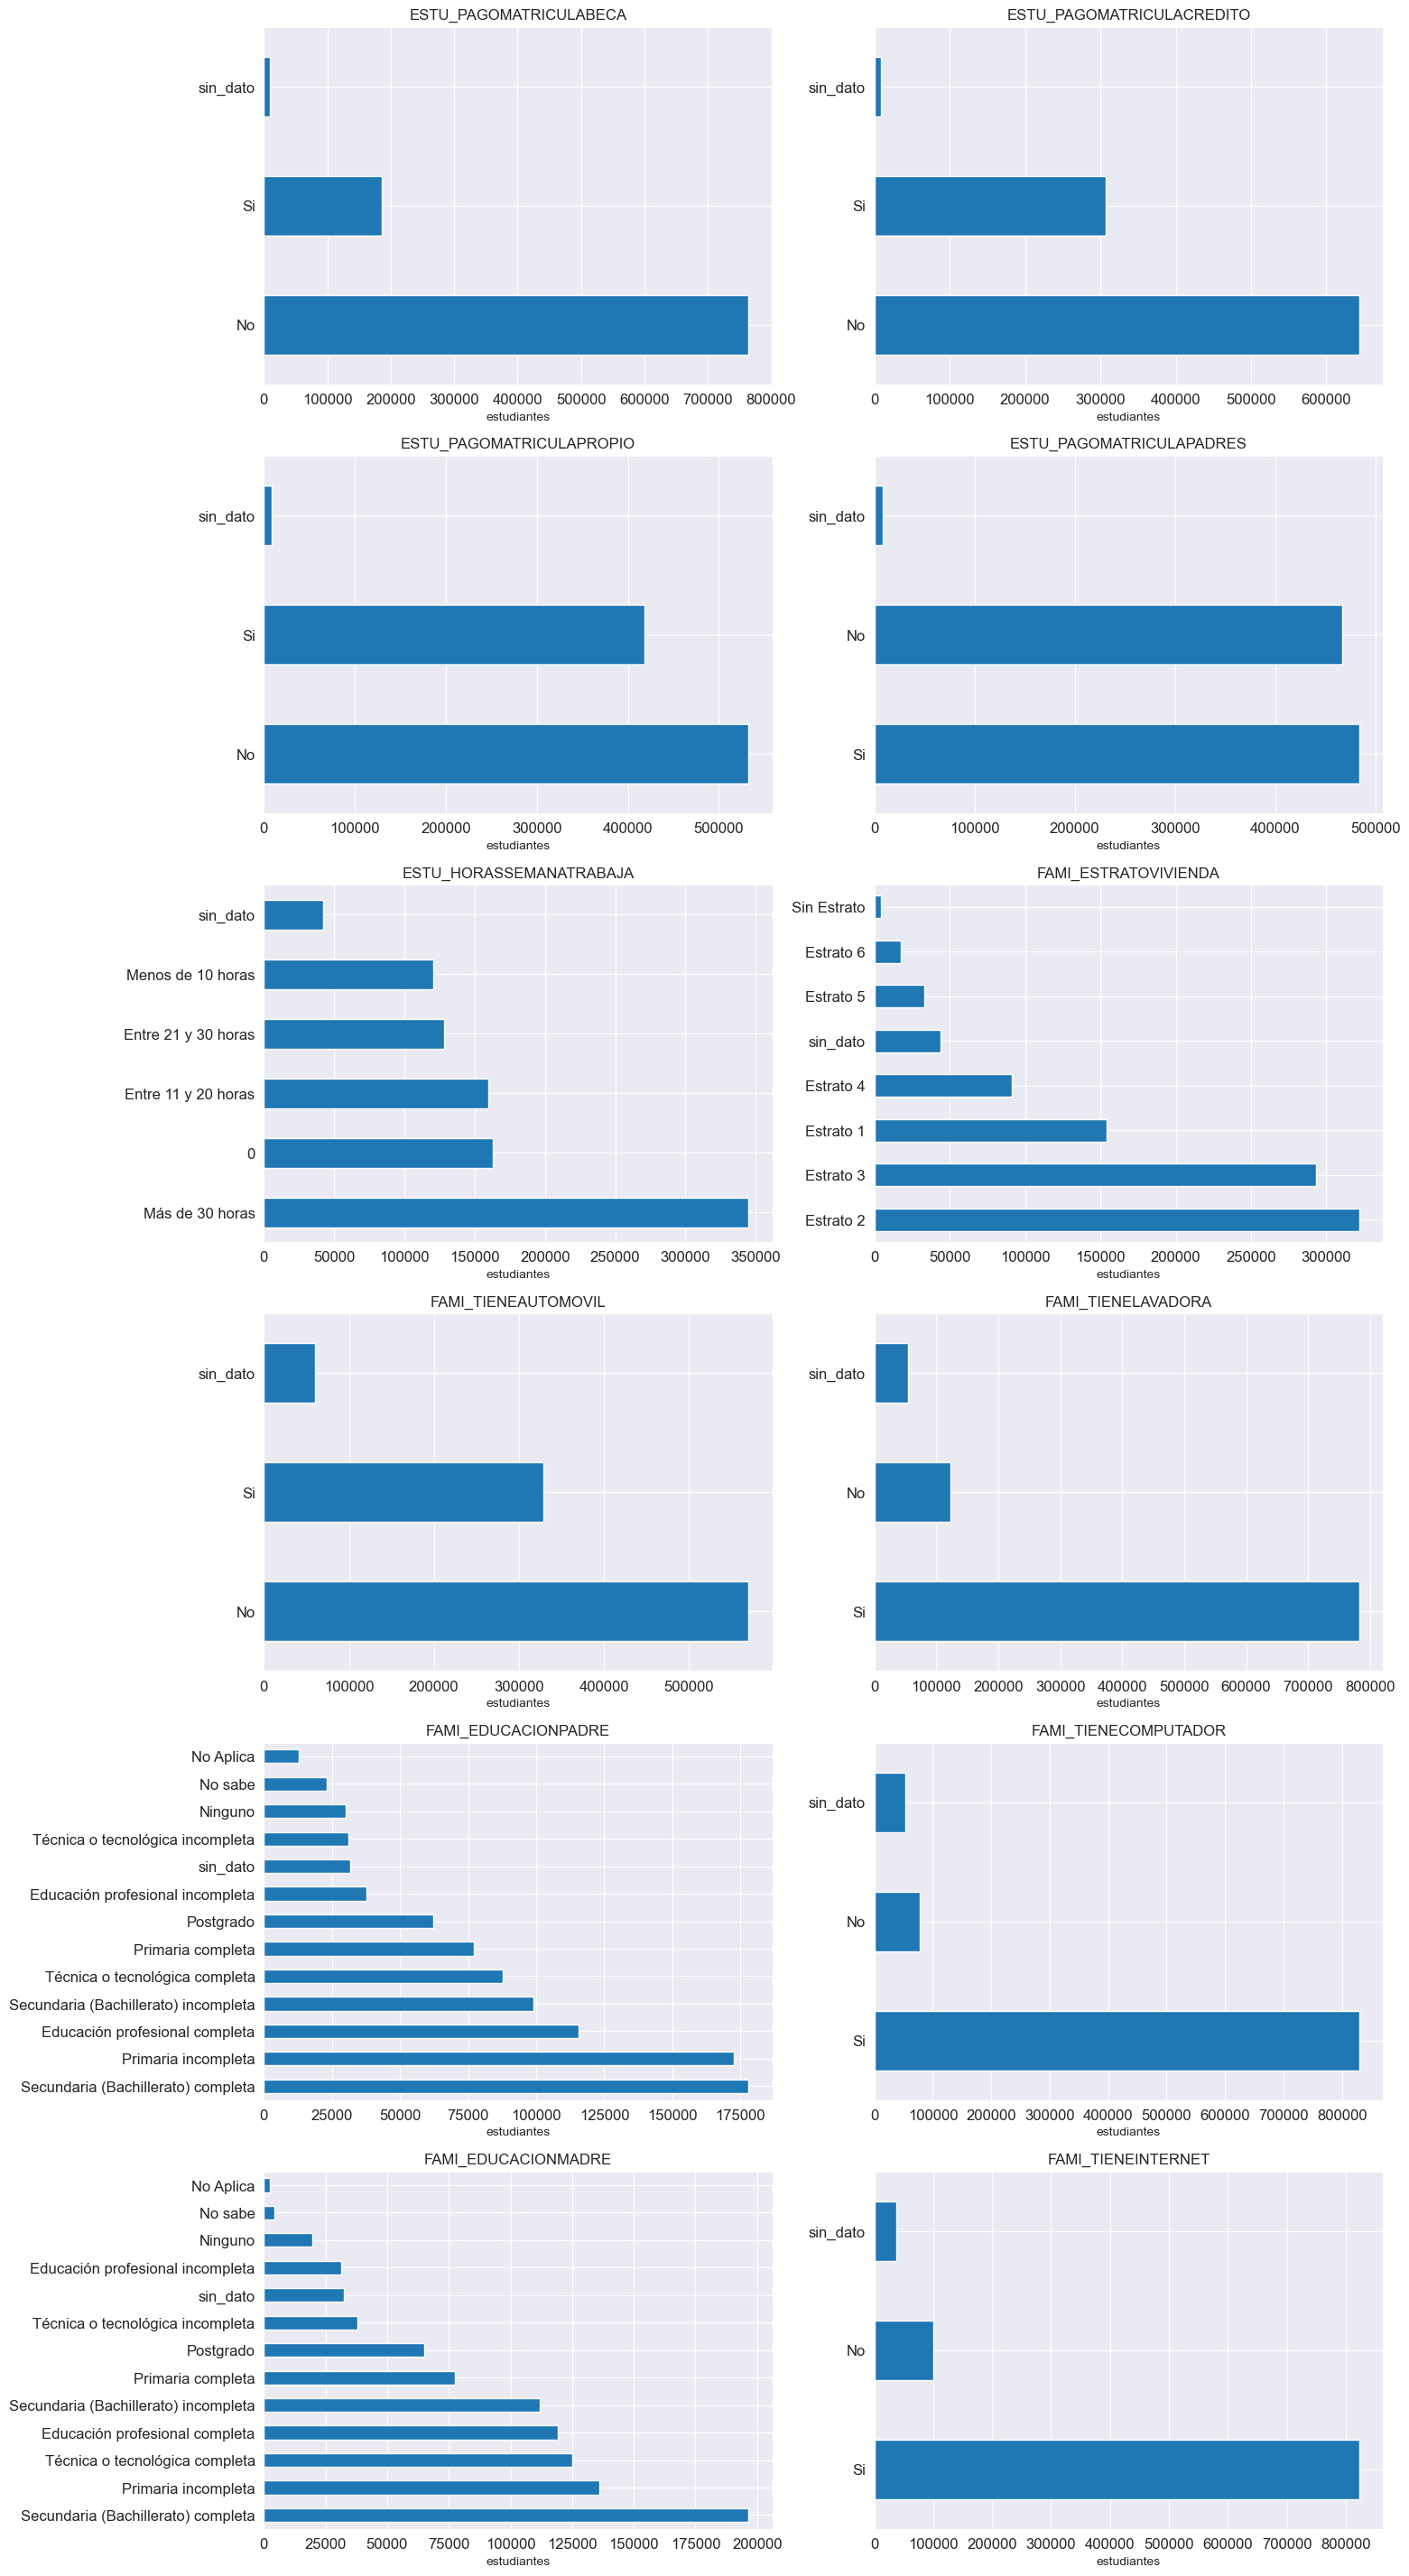

In [123]:
# Se elimminan las variables que ya graficadas

estu_cat= estu_cat.drop(['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_NUCLEO_PREGRADO','ESTU_PRGM_ACADEMICO',
'Id_ESTU', 'ESTU_GENERO'], axis=1)

# Se organiza los indices del dataframe para el grafico.

estu_cat = estu_cat.iloc[:,[0,1,4,3,2,8,6,7,5,9,11,10]]

def graficos_eda_cat(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    
    for a, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[a])
        ax[a].set_title(variable, fontsize = 12)
        ax[a].tick_params(labelsize = 12)
        ax[a].set_xlabel('estudiantes')


graficos_eda_cat(estu_cat)        

In [21]:
# variables Numericas

estu_num= estudiantes.select_dtypes('number')
estu_num=estu_num.drop(['Id_MCPIO','Id_INSTITUCION'], axis=1)
estu_num['DESEM_TOTAL']=(estu_num['MOD_COMUNI_ESCRITA_DESEM']+estu_num['MOD_RAZONA_CUANTITAT_DESEM']+estu_num['MOD_LECTURA_CRITICA_DESEM']+estu_num['MOD_COMPETEN_CIUDADA_DESEM']+estu_num['MOD_INGLES_DESEM2'])//5

In [22]:
estu_num.head(3)

,AÑO,ESTU_EDAD,MOD_COMUNI_ESCRITA_DESEM,MOD_RAZONA_CUANTITAT_DESEM,MOD_LECTURA_CRITICA_DESEM,MOD_COMPETEN_CIUDADA_DESEM,MOD_INGLES_DESEM2,DESEM_TOTAL
0,2018,21,3,3,2,2,2.0,2.0
1,2018,23,3,2,3,3,3.0,2.0
2,2018,24,1,2,2,3,1.0,1.0


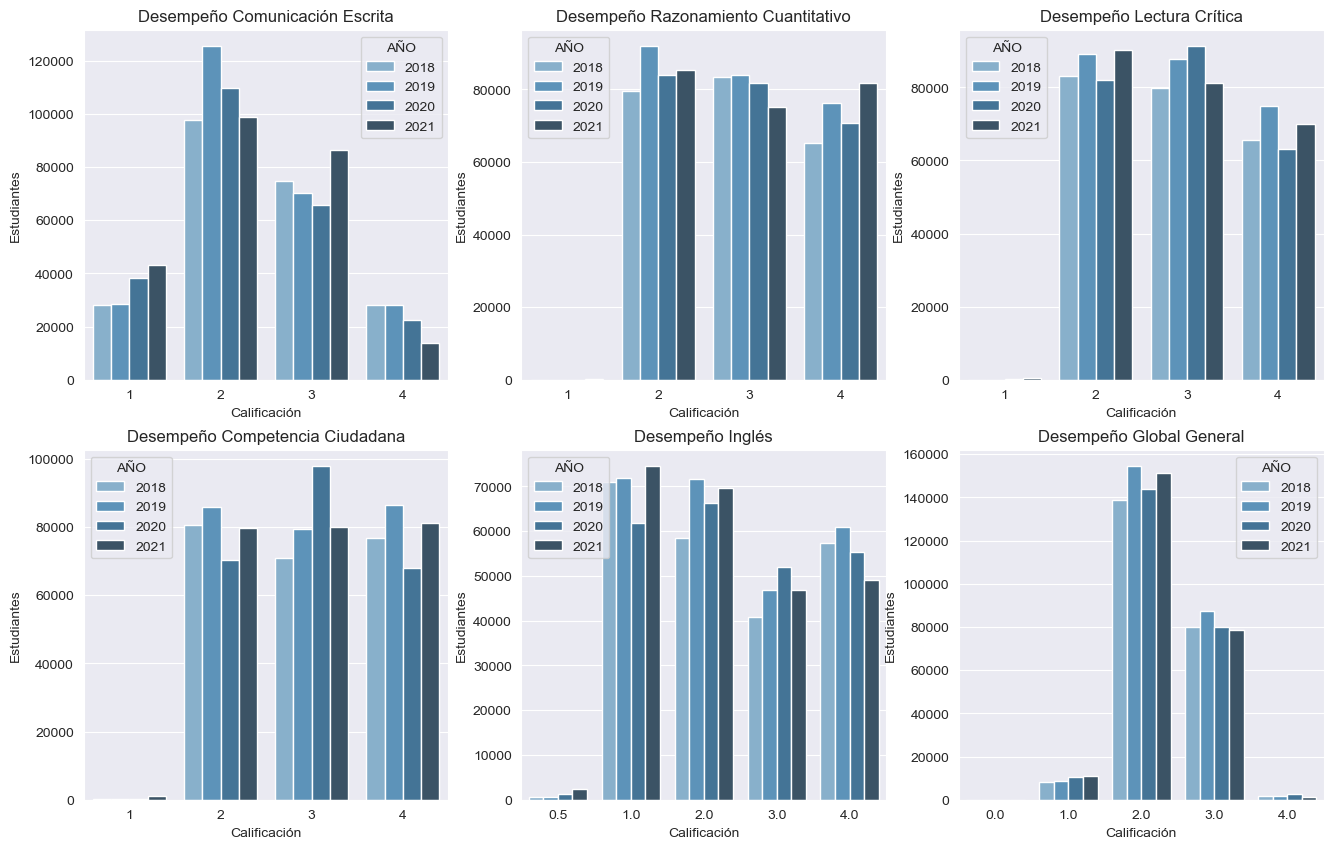

In [23]:
# Distribucón de ejes

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10))

# Generacioón de graficas de variables numericas

sns.countplot( x="MOD_COMUNI_ESCRITA_DESEM",  data = estu_num, hue="AÑO",  palette = "Blues_d"
, ax=ax[0,0]).set( title = "Desempeño Comunicación Escrita", xlabel="Calificación", ylabel = "Estudiantes")

sns.countplot( x="MOD_RAZONA_CUANTITAT_DESEM",  data = estu_num, palette = "Blues_d",hue="AÑO",
 ax=ax[0,1]).set( title = "Desempeño Razonamiento Cuantitativo", xlabel="Calificación", ylabel = "Estudiantes")


sns.countplot( x="MOD_LECTURA_CRITICA_DESEM",  data = estu_num, palette = "Blues_d",hue="AÑO", 
ax=ax[0,2]).set( title = "Desempeño Lectura Crítica", xlabel="Calificación", ylabel = "Estudiantes")

sns.countplot( x="MOD_COMPETEN_CIUDADA_DESEM",  data = estu_num, palette = "Blues_d",hue="AÑO"
, ax=ax[1,0]).set( title = "Desempeño Competencia Ciudadana", xlabel="Calificación", ylabel = "Estudiantes")

sns.countplot( x="MOD_INGLES_DESEM2",  data = estu_num, palette = "Blues_d",hue="AÑO"
, ax=ax[1,1]).set( title = "Desempeño Inglés", xlabel="Calificación", ylabel = "Estudiantes")


sns.countplot( x="DESEM_TOTAL",  data = estu_num, palette = "Blues_d",hue="AÑO"
, ax=ax[1,2]).set( title = "Desempeño Global General", xlabel="Calificación", ylabel = "Estudiantes")

plt.show()

*Se Divide el Dataframe para crear tres tablas relacionales. Puntaje, Instituciones y estudiantes para su manipulacion en mySQL, PowerBI*


In [24]:
# Puntaje

puntaje=dq[[ 'Id_ESTU','MOD_RAZONA_CUANTITAT_PUNT','MOD_COMUNI_ESCRITA_PUNT',
'MOD_LECTURA_CRITICA_PUNT','MOD_INGLES_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT']]

puntaj=dq[[ 'MOD_RAZONA_CUANTITAT_PUNT','MOD_COMUNI_ESCRITA_PUNT',
'MOD_LECTURA_CRITICA_PUNT','MOD_INGLES_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT']]
puntaje.head(2)

,Id_ESTU,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,EK201830011083,161,174,139,161,128
1,EK201830053875,147,170,171,188,182


In [25]:
# Instituciones

instituciones=dq[['Id_INSTITUCION','INSTITUCION','INST_CARACTER_ACADEMICO','ESTU_INST_CODMUNICIPIO','ESTU_INST_MUNICIPIO']]
instituciones=instituciones.rename({'ESTU_INST_CODMUNICIPIO':'IdMCPIO'}, axis=1)
instituciones=instituciones.drop(['ESTU_INST_MUNICIPIO'], axis=1)
instituciones.head(2)

,Id_INSTITUCION,INSTITUCION,INST_CARACTER_ACADEMICO,IdMCPIO
0,2834,UNIVERSITARIA AGUSTINIANA- UNIAGUSTINIANA-BOGO...,INSTITUCIÓN UNIVERSITARIA,11001
1,1203,UNIVERSIDAD DEL VALLE-CALI,UNIVERSIDAD,76001


In [26]:
# se exporta los datos

#puntaje.to_csv("databases/puntaje.csv",index=False)
#instituciones.to_csv("databases/instituciones.csv",index=False)
#estudiantes.to_csv("databases/estudiantes.csv",index=False)